# Requisições web GodsUnchained

## 1. API: Pegando informações sobre as cartas

In [1]:
import requests
import json
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',None)

In [3]:
def basic_cards_information():
    
    base_url = 'https://api.godsunchained.com'
    version = 'v0'
    proto = 'proto?page=0'
    url = "/".join(i for i in [base_url, version, proto])
    
    try:
        req = requests.get(url)
    except Exception as erro:
        print('DEU ERRO:\t', erro)
    
    cards = json.loads(req.text)['records']
    informacoes = ['id','name','effect','god','rarity',
                   ('tribe','String'), 'mana',('attack','Int64'),
                   ('health','Int64'), 'type', 'set']
    
    resposta = []
    for card in cards:
        atributos = []
        for inf in informacoes:
            if not isinstance(inf,str):
                atributos.append(card[inf[0]][inf[1]])
                continue
            atributos.append(card[inf])
        resposta.append(atributos)
        
            
    df = pd.DataFrame(data=resposta, columns=['id','name','effect','god',
                                                'rarity','tribe', 'mana',
                                                'attack','health', 'type', 'set'])
    return df

In [4]:
df = basic_cards_information()
df

,id,name,effect,god,rarity,tribe,mana,attack,health,type,set
0,10,Catacomb Curator,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,death,rare,anubian,1,1,2,creature,genesis
1,66,Balance Ethereals,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",neutral,rare,aether,6,4,5,creature,genesis
2,11,Gloam Druid,Roar: Your confused creatures get +2 strength.,nature,epic,mystic,2,2,2,creature,genesis
3,67,Golem Centurion,Afterlife: Summon a random legendary creature.,neutral,rare,atlantean,7,5,7,creature,genesis
4,68,"Petard ""Elder""",Afterlife: Deal 2 damage to a random enemy creature.,neutral,rare,,3,3,2,creature,genesis
5,69,Malfunctioning Servitor,Roar: Transform another random creature into a 1/5 or 5/1 Malfunctioning Artifice.,neutral,rare,atlantean,3,3,3,creature,genesis
6,77,Enraged Ally,"Whenever a friendly creature dies, this creature gets +1 strength.",neutral,rare,,2,2,2,creature,genesis
7,15,Respected Jarl,Blitz.<br>Roar: Give a friendly damaged creature twin strike and +1 strength.,war,epic,viking,2,2,1,creature,genesis
8,18,Levitate,Remove frontline and backline from target creature.<br>Draw a card.,magic,common,,1,0,0,spell,genesis
9,2,Siren of the Grave,Roar: Obliterate a card in your hand.<br>Afterlife: All enemy creatures go to sleep.,death,rare,,1,2,2,creature,genesis


## 2. API: Pegando informações sobre valores das cartas

In [5]:
def get_card_price(proto_id, quality, buy_token_type):

    gods_address= "0xacb3c6a43d15b907e8433077b6d38ae40936fe2c"
    base_url = "https://api.x.immutable.com/v1/orders?"
    metadata_str = "%7B%22proto%22%3A%5B%22{}%22%5D%2C%22quality%22%3A%5B%22{}%22%5D%7D".format(proto_id,quality)
    filters = [
        ("direction","asc"),
        ("include_fees","true"),
        ("order_by","buy_quantity"),
        ("page_size","200"),
        ("sell_metadata",metadata_str.replace('\\',"")),
        ("sell_token_type","ERC721"),
        ("status","active"),
        ("sell_token_address", gods_address),
    ]
    if buy_token_type == "GODS":
        filters.append(("buy_token_address","0xccc8cb5229b0ac8069c51fd58367fd1e622afd97"))
    else:
        filters.append(("buy_token_type", "ETH"))
    url = f"{base_url}" + "&".join([
      f"{x[0]}={x[1]}" for x in filters
    ])
    response = requests.get(url)
    try:
        data = response.json()

        volume = len(data['result'])
        token_id = data['result'][0]['sell']['data']['token_id']
        card_name = data['result'][0]['sell']['data']['properties']['name']
        int_price = int(data['result'][0]['buy']['data']['quantity'])
        decimals = int(data['result'][0]['buy']['data']['decimals'])
        timestamp = data['result'][0]['timestamp']
        site = f"https://market.x.immutable.com/assets/{gods_address}/{token_id}"
        return {
            "site": site,
            "card_name": card_name,
            "price": int_price / 10 ** decimals,
            "coin": buy_token_type,
            "volume": volume,
            "timestamp": timestamp
        }
    except:
        return {
            "error": response.status_code,
            "url": response.url
        }

In [4]:
def economic_information(df, cotacao_ETH, cotacao_GODS):
    
    protos = [str(i) for i in df['id']]
    cards = []
    for proto in protos:
        try:
            lista = cards.append(float(get_card_price(proto, 'Meteorite', 'ETH')['price'])*cotacao_ETH)     
        except:
            cards.append(np.nan)
    
    cards_2 = []
    for proto in protos:
        try:
            lista = cards_2.append(float(get_card_price(proto, 'Meteorite', 'GODS')['price'])*cotacao_GODS)     
        except:
            cards_2.append(np.nan)
    
    df_economic = pd.DataFrame({'price_ETH_$':cards, 'price_GODS_$':cards_2})

    return pd.concat([df, df_economic], axis=1)
    

In [3]:
df_values = economic_information(df,2925.66, 1.350)

lista = []
for e, g in zip(df_values['price_ETH_$'], df_values['price_GODS_$']):
    lista.append(abs(e-g)/min(e,g))

df_values['difference_%'] = lista
df_values.head()

NameError: name 'economic_information' is not defined

In [5]:
# O codigo acima leva muito tempo pra rodar, vamos salvar o output

# df_values.to_csv('godsunchained_complet.csv')

# Importando, pra não ter que rodar o codigo acima

df_values = pd.read_csv('godsunchained_complet.csv')
df_values.tribe.fillna('None', inplace=True)
df_values.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df_values.head()

,id,name,effect,god,rarity,tribe,mana,attack,health,type,set,price_ETH_$,price_GODS_$,difference_%
0,10,Catacomb Curator,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,death,rare,anubian,1,1,2,creature,genesis,1.285389,1.255500,0.023806
1,66,Balance Ethereals,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",neutral,rare,aether,6,4,5,creature,genesis,1.521782,1.889999,0.241964
2,11,Gloam Druid,Roar: Your confused creatures get +2 strength.,nature,epic,mystic,2,2,2,creature,genesis,146.120626,185.308375,0.268188
3,67,Golem Centurion,Afterlife: Summon a random legendary creature.,neutral,rare,atlantean,7,5,7,creature,genesis,9.627118,12.259189,0.273402
4,68,"Petard ""Elder""",Afterlife: Deal 2 damage to a random enemy creature.,neutral,rare,None,3,3,2,creature,genesis,2.765802,2.578500,0.072640


## 3. Web Scrapping: Pegando mais informações sobre as cartas

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from time import sleep

options = Options()
options.add_argument('window-size=800,800')

navegador = webdriver.Chrome()
navegador.get('https://gudecks.com/meta/card-rankings')

sleep(10)

but = navegador.find_element(By.XPATH, '//*[@id="root"]/div[3]/button')
but.click()

sleep(0.5)

# Alterando o numero de matchs necessario para selecionar as cartas 
#but_2 = navegador.find_element(By.XPATH, '//*[@id="root"]/div[1]/div/div[2]/div[1]/div[1]/div[7]/div[2]/div/div/div')
#but_2.click()
#navegador.find_element(By.XPATH, '//*[@id="rrs-decksWithCard-menu"]/li[3]').click() # li[1] ou li[2]...

informations = [] # Todas as paginas
for i in range(49):
    informations.append(BeautifulSoup(navegador.page_source, 'html.parser'))
    but = navegador.find_element(By.XPATH, '//*[@id="root"]/div[1]/div/div[2]/div[1]/div[2]/div[2]/div/div[3]/button')
    but.click()
    sleep(0.025)

all_cards = [] 
for site in informations:
    cards = site.findAll('div', attrs={'class':'rt-tr-group'})
    for card in cards:
        little_list = []
        try:
            little_list.append(card.find('div', attrs={'class':'card-ranking-name'}).text) # Nome da carta
        except:
            continue
        little_list.extend([atr.text for atr in card.findAll('div', attrs={'class':'rt-td react-table-cell'})]) #Info das cartas

        all_cards.append(little_list)
    
    

colunas = ['Name', 'God', 'Set', 'Matches', 'In % of Decks', 'Copies', 'Deck win rate', 'Unique Deck WR','Est. Price']
df_web_scrap = pd.DataFrame(all_cards, columns=colunas)
df_web_scrap.head()

,Name,God,Set,Matches,In % of Decks,Copies,Deck win rate,Unique Deck WR,Est. Price
0,Sulphuric Rain,Death,Genesis,4.628,5.4%,1.78,66.9%,67.4%,0.0590
1,Apocalypse Now,Death,Genesis,5.201,6.0%,1.80,65.9%,66.3%,0.1500
2,Hippacria's Monster,Death,Trial,3.619,4.2%,1.00,64.9%,65.2%,0.0220
3,Neferu's Khopesh,Death,Trial,3.905,4.5%,1.00,64.4%,64.8%,0.0163
4,Siren of the Grave,Death,Genesis,5.706,6.6%,1.91,64.0%,64.4%,0.0115


## 4. Juntando tudo:

In [11]:
df_more = df_web_scrap.drop(labels=['God','Set','Est. Price', 'Matches', 'Copies'], axis=1)
df_more.head()

,Name,In % of Decks,Deck win rate,Unique Deck WR
0,Runaway Trebuchet,0.1%,68.3%,68.3%
1,Sulphuric Rain,4.6%,66.6%,67.0%
2,That Which Aches,0.1%,66.4%,66.5%
3,Apocalypse Now,5.1%,65.6%,66.0%
4,Hippacria's Monster,3.5%,64.5%,64.9%


#### 4.1 Small cleaning

In [12]:
for column in df_more:
    df_more[column] = df_more[column].apply(lambda x: ''.join([i for i in x if i != '%']))

for i in ['In % of Decks', 'Deck win rate', 'Unique Deck WR']:
    df_more[i] = df_more[i].apply(lambda x: float(x)/100)

    
df_more.rename({'Name': 'name'}, axis=1, inplace=True)
df_more.head()

,name,In % of Decks,Deck win rate,Unique Deck WR
0,Runaway Trebuchet,0.001,0.683,0.683
1,Sulphuric Rain,0.046,0.666,0.670
2,That Which Aches,0.001,0.664,0.665
3,Apocalypse Now,0.051,0.656,0.660
4,Hippacria's Monster,0.035,0.645,0.649


#### 4.2 Juntando tudo de novo

In [13]:
df_basic = df_values.dropna(axis=0)
df_basic.shape

(988, 14)

In [14]:
df_all = pd.merge(df_basic, df_more, on='name')
df_all.head()

,id,name,effect,god,rarity,tribe,mana,attack,health,type,set,price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
0,10,Catacomb Curator,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,death,rare,anubian,1,1,2,creature,genesis,1.285389,1.255500,0.023806,0.002,0.466,0.466
1,66,Balance Ethereals,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",neutral,rare,aether,6,4,5,creature,genesis,1.521782,1.889999,0.241964,0.000,0.472,0.472
2,11,Gloam Druid,Roar: Your confused creatures get +2 strength.,nature,epic,mystic,2,2,2,creature,genesis,146.120626,185.308375,0.268188,0.005,0.596,0.596
3,67,Golem Centurion,Afterlife: Summon a random legendary creature.,neutral,rare,atlantean,7,5,7,creature,genesis,9.627118,12.259189,0.273402,0.001,0.447,0.447
4,68,"Petard ""Elder""",Afterlife: Deal 2 damage to a random enemy creature.,neutral,rare,None,3,3,2,creature,genesis,2.765802,2.578500,0.072640,0.000,0.550,0.550


## 5. Basic EDA and pre-processing

In [8]:
# A diferença no shape se da pois no df_more não há todas as cartas que há no df_basic

print(df_basic.shape)
print(df_more.shape)
print(df_all.shape)

NameError: name 'df_basic' is not defined

In [9]:
df_all.info()

NameError: name 'df_all' is not defined

In [17]:
df_all.describe()

,id,mana,attack,health,price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,830.122886,3.611048,2.075536,2.593010,16.336297,20.681402,0.184892,0.066489,0.522316,0.523462
std,492.335217,2.080982,2.134829,2.425429,64.829430,80.626563,0.252502,0.122098,0.041938,0.042898
min,1.000000,1.000000,0.000000,0.000000,0.015773,0.019849,0.000007,0.000000,0.317000,0.317000
25%,277.500000,2.000000,0.000000,0.000000,0.174340,0.179342,0.061390,0.003000,0.501000,0.501000
50%,1003.000000,3.000000,2.000000,2.000000,0.886475,1.000454,0.115813,0.016000,0.526000,0.527000
75%,1231.500000,5.000000,3.000000,4.000000,4.806172,5.304737,0.218280,0.064500,0.545000,0.547000
max,1493.000000,16.000000,13.000000,17.000000,1053.164780,1197.834736,4.232746,0.736000,0.683000,0.683000


### 5.1 Index

In [18]:
df_all.set_index('id', drop=True, inplace=True)
df_all.head()

,name,effect,god,rarity,tribe,mana,attack,health,type,set,price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
id,,,,,,,,,,,,,,,,
10,Catacomb Curator,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,death,rare,anubian,1,1,2,creature,genesis,1.285389,1.255500,0.023806,0.002,0.466,0.466
66,Balance Ethereals,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",neutral,rare,aether,6,4,5,creature,genesis,1.521782,1.889999,0.241964,0.000,0.472,0.472
11,Gloam Druid,Roar: Your confused creatures get +2 strength.,nature,epic,mystic,2,2,2,creature,genesis,146.120626,185.308375,0.268188,0.005,0.596,0.596
67,Golem Centurion,Afterlife: Summon a random legendary creature.,neutral,rare,atlantean,7,5,7,creature,genesis,9.627118,12.259189,0.273402,0.001,0.447,0.447
68,"Petard ""Elder""",Afterlife: Deal 2 damage to a random enemy creature.,neutral,rare,None,3,3,2,creature,genesis,2.765802,2.578500,0.072640,0.000,0.550,0.550


### 5.2 Categorical columns

In [141]:
df_categorical = df_all[df_all.dtypes[df_all.dtypes == 'object'].index]
df_categorical.head()

,name,effect,god,rarity,tribe,type,set
id,,,,,,,
10,Catacomb Curator,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,death,rare,anubian,creature,genesis
66,Balance Ethereals,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",neutral,rare,aether,creature,genesis
11,Gloam Druid,Roar: Your confused creatures get +2 strength.,nature,epic,mystic,creature,genesis
67,Golem Centurion,Afterlife: Summon a random legendary creature.,neutral,rare,atlantean,creature,genesis
68,"Petard ""Elder""",Afterlife: Deal 2 damage to a random enemy creature.,neutral,rare,None,creature,genesis


#### 5.2.1 Categorical EDA

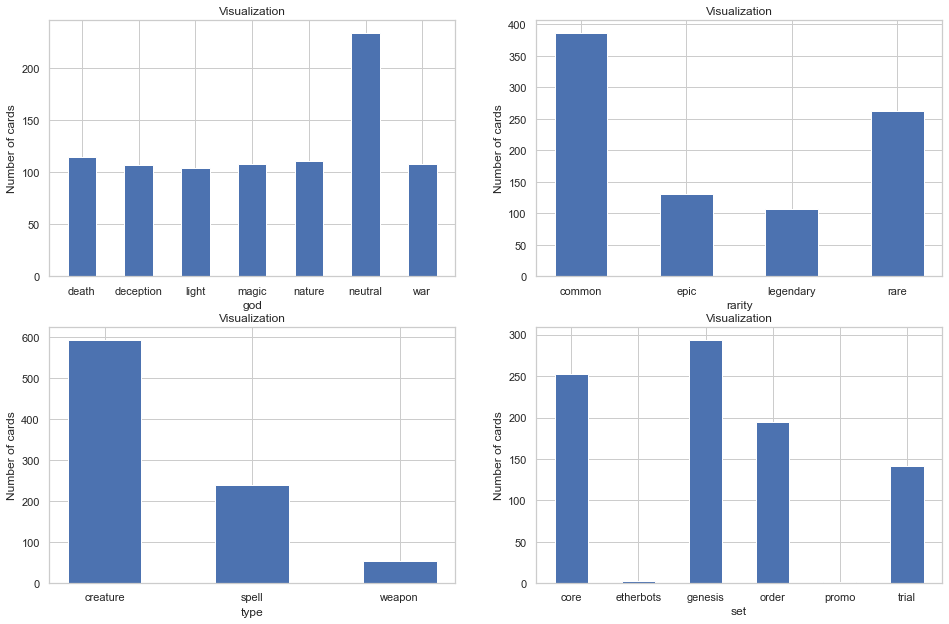

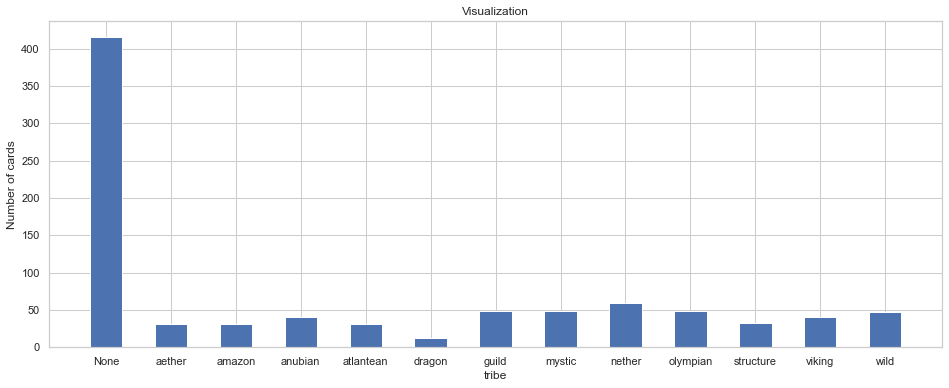

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
i = 1
for col in df_categorical.drop(['name','effect'],axis=1):
    if col == 'tribe':
        continue
    test = df_categorical.groupby(by=col).agg({'name':'count'})
    
    
    plt.subplot(3, 2, i)

    plt.bar(test.index, test.name, 0.5, label='God')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.ylabel('Number of cards')
    plt.xlabel(col)
    plt.title('Visualization')

    # Label with label_type 'center' instead of the default 'edge'
    i +=1


plt.figure(figsize=(16,6))
test = df_categorical.groupby(by='tribe').agg({'name':'count'})


plt.bar(test.index, test.name, 0.5, label='God')
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylabel('Number of cards')
plt.xlabel('tribe')
plt.title('Visualization')

plt.show()


#### 5.2.2 Binarizando algumas colunas categoricas

In [143]:
df_categorical.loc[:,'god':'set'].head()

,god,rarity,tribe,type,set
id,,,,,
10,death,rare,anubian,creature,genesis
66,neutral,rare,aether,creature,genesis
11,nature,epic,mystic,creature,genesis
67,neutral,rare,atlantean,creature,genesis
68,neutral,rare,None,creature,genesis


In [145]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first')

x_bin = pd.DataFrame(onehot.fit_transform(df_categorical.loc[:,'god':'set']), index=df_categorical.index, columns=onehot.get_feature_names_out())
x_bin.head()

,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [146]:
df_categorical = pd.concat([df_categorical.loc[:,'name':'effect'], x_bin], axis=1)
df_categorical.head()

,name,effect,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,Catacomb Curator,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
66,Balance Ethereals,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,Gloam Druid,Roar: Your confused creatures get +2 strength.,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67,Golem Centurion,Afterlife: Summon a random legendary creature.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
68,"Petard ""Elder""",Afterlife: Deal 2 damage to a random enemy creature.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [147]:
df_categorical.shape

(887, 30)

### 5.3 Numerical (int) columns

In [148]:
df_int = df_all[df_all.dtypes[df_all.dtypes == 'int64'].index]
df_int.head()

,mana,attack,health
id,,,
10,1,1,2
66,6,4,5
11,2,2,2
67,7,5,7
68,3,3,2


#### 5.3.1 Numerical EAD

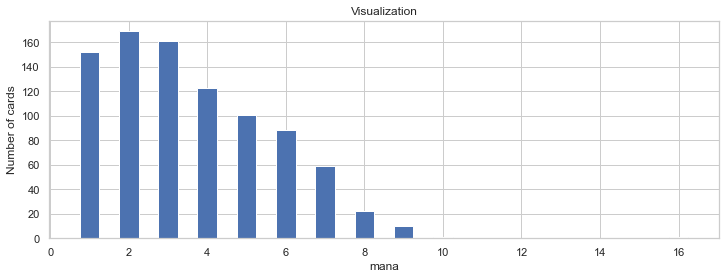

In [149]:
test = df_int.groupby('mana').agg({'attack':'count'})

plt.figure(figsize=(12,4))

plt.bar(test.index, test.attack, 0.5, label='Mana')
plt.ylabel('Number of cards')
plt.xlabel('mana')
plt.title('Visualization')

plt.show()

#### 5.3.2 Normalizando

In [150]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

norm_int = StandardScaler()
df_int_norm = pd.DataFrame(norm_int.fit_transform(df_int), index=list(df_int.index),columns=[list(df_int.columns)])
df_int_norm.head()

,mana,attack,health
10,-1.255427,-0.504088,-0.244635
66,1.148640,0.901969,0.992958
11,-0.774614,-0.035402,-0.244635
67,1.629453,1.370655,1.818019
68,-0.293800,0.433284,-0.244635


### 5.4 Numerical (float) columns

In [151]:
df_float = df_all[df_all.dtypes[df_all.dtypes == 'float'].index]
df_float.head()

,price_ETH_$,price_GODS_$,difference_%,In % of Decks,Deck win rate,Unique Deck WR
id,,,,,,
10,1.285389,1.255500,0.023806,0.002,0.466,0.466
66,1.521782,1.889999,0.241964,0.000,0.472,0.472
11,146.120626,185.308375,0.268188,0.005,0.596,0.596
67,9.627118,12.259189,0.273402,0.001,0.447,0.447
68,2.765802,2.578500,0.072640,0.000,0.550,0.550


### 5.4.1 Defining the target

In [152]:
from pandas.core.frame import DataFrame
lista = []
for i, j in zip(df_float["price_ETH_$"], df_float["price_GODS_$"]):
  lista.append((i+j)/2)

y = pd.DataFrame({'price_real_$': lista}, index= df_float.index)
y.head()

,price_real_$
id,
10,1.270444
66,1.705890
11,165.714500
67,10.943154
68,2.672151


[9.31127715]


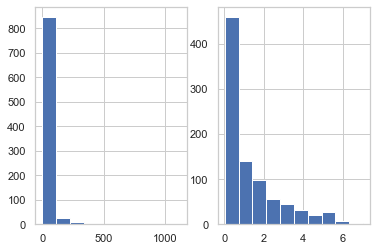

In [153]:
from scipy.stats import skew

print(skew(y))

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(y)
ax[1].hist(np.log1p(y))
plt.show()

In [154]:
y = np.log1p(y)
y.head()

,price_real_$
id,
10,0.819976
66,0.995431
11,5.116283
67,2.480158
68,1.300778


In [155]:
df_float = pd.concat([df_float.loc[:,'In % of Decks':'Unique Deck WR'],y],axis=1)
df_float.head()

,In % of Decks,Deck win rate,Unique Deck WR,price_real_$
id,,,,
10,0.002,0.466,0.466,0.819976
66,0.000,0.472,0.472,0.995431
11,0.005,0.596,0.596,5.116283
67,0.001,0.447,0.447,2.480158
68,0.000,0.550,0.550,1.300778


### 5.5 Juntando tudo

In [156]:
print(df_categorical.shape)
print(df_int_norm.shape)
print(df_float.shape)

(887, 30)
(887, 3)
(887, 4)


In [157]:
df_all_clean = pd.concat([df_categorical, df_int_norm, df_float], axis=1)

#df_more.rename({'Name': 'name'}, axis=1, inplace=True)
df_all_clean.head()


,name,effect,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)",In % of Decks,Deck win rate,Unique Deck WR,price_real_$
10,Catacomb Curator,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.255427,-0.504088,-0.244635,0.002,0.466,0.466,0.819976
66,Balance Ethereals,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.148640,0.901969,0.992958,0.000,0.472,0.472,0.995431
11,Gloam Druid,Roar: Your confused creatures get +2 strength.,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774614,-0.035402,-0.244635,0.005,0.596,0.596,5.116283
67,Golem Centurion,Afterlife: Summon a random legendary creature.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.629453,1.370655,1.818019,0.001,0.447,0.447,2.480158
68,"Petard ""Elder""",Afterlife: Deal 2 damage to a random enemy creature.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.293800,0.433284,-0.244635,0.000,0.550,0.550,1.300778


#### 5.5.1 Small EAD

C:\Users\isaac\AppData\Local\Temp\ipykernel_2848\2585339577.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


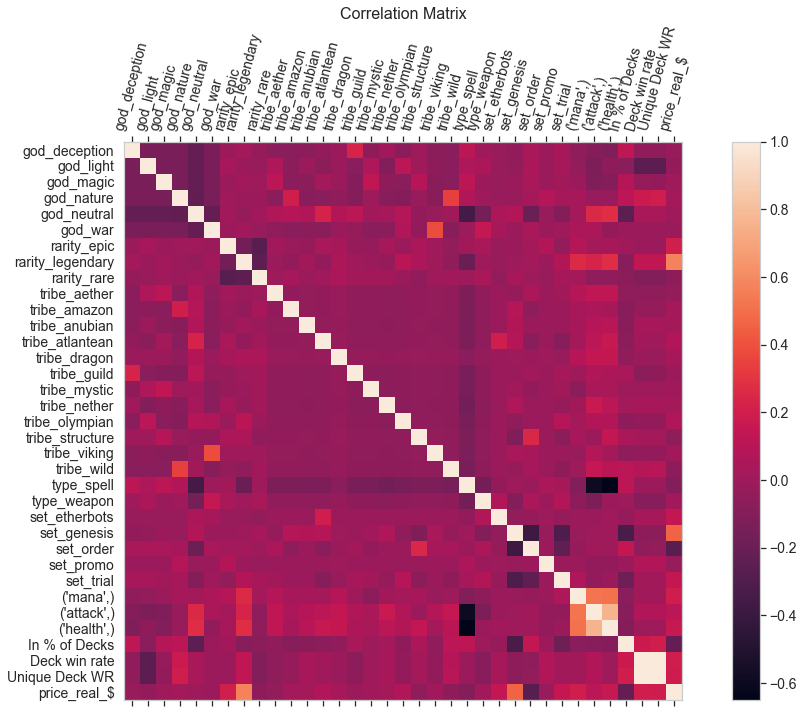

In [162]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(18, 10))


plt.matshow(df_all_clean.corr(), fignum=f.number)
plt.xticks(range(df_all_clean.select_dtypes(['number']).shape[1]), df_all_clean.select_dtypes(['number']).columns, fontsize=14, rotation=75)
plt.yticks(range(df_all_clean.select_dtypes(['number']).shape[1]), df_all_clean.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.grid(False)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

plt.show()

## 6. Modeling the first machine learning model to estimate the values of cards

In [163]:
# To create a simple baseline, I will drop the effect column and get the results

df_baseline = df_all_clean.drop(labels=['name','effect'], axis=1)
df_baseline.head()

,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)",In % of Decks,Deck win rate,Unique Deck WR,price_real_$
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.255427,-0.504088,-0.244635,0.002,0.466,0.466,0.819976
66,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.148640,0.901969,0.992958,0.000,0.472,0.472,0.995431
11,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774614,-0.035402,-0.244635,0.005,0.596,0.596,5.116283
67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.629453,1.370655,1.818019,0.001,0.447,0.447,2.480158
68,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.293800,0.433284,-0.244635,0.000,0.550,0.550,1.300778


#### 6.1 Train/Test split

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_baseline.drop('price_real_$', axis=1), y, test_size=0.33, random_state=1)

In [165]:
print("X train shape - ", X_train.shape)
print("X test shape - ", X_test.shape)
print("y train shape - ", y_train.shape)
print("y test shape - ", y_test.shape)

X train shape -  (594, 34)
X test shape -  (293, 34)
y train shape -  (594, 1)
y test shape -  (293, 1)


#### 6.2 Preparing results

In [166]:
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import explained_variance_score # EVS

In [167]:
results = {
    "Model":[],
    "Kind":[],
    "MAE":[],
    "MSE":[],
    "EVS":[]
}
results = pd.DataFrame(results)

In [168]:
y_true = y_test
X_df, X_train, X_test = X_train, X_train.values, X_test.values
def addModelToResults(model_name="None",model_kind="None"):
    '''Essa função adiciona o resultado do seu modelo ao "results" global,
    lembre-se de criar um results com as variaveis corretas:
        results = {
        "Model":[],
        "Kind":[],
        "MAE":[],
        "MSE":[],
        "EVS":[]
    }'''
    global results
    parameters = {
        'Model': [model_name],
        'Kind': [model_kind],
        'MAE': [mean_absolute_error(y_true, y_pred)],
        'MSE': [mean_squared_error(y_true, y_pred)],
        'EVS': [explained_variance_score(y_true, y_pred)]
    }
    parameters = pd.DataFrame(parameters)
    results = pd.concat([results, parameters], ignore_index=True)

#### 6.3 Modeling

In [169]:
# linear models
from sklearn.linear_model import Ridge, LinearRegression, Lars, BayesianRidge, Perceptron, SGDRegressor
from sklearn.linear_model import RidgeCV, ElasticNet, LassoCV, LassoLarsCV, OrthogonalMatchingPursuit, ARDRegression
from sklearn.linear_model import PassiveAggressiveClassifier, TheilSenRegressor, HuberRegressor

# tree models
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor

# svm models
from sklearn.svm import LinearSVR, NuSVR, SVR

# closed neural network models
from sklearn.neural_network import MLPRegressor

# open neural network models
from keras.models import Sequential
from keras.layers import Dense, Dropout

# ensemble models
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

##### 6.3.1 Linear Models

In [170]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
addModelToResults('Ridge',"Linear")

In [171]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
addModelToResults('Linear Regression',"Linear")

In [172]:
model_BR = BayesianRidge()
model_BR.fit(X_train, y_train.values.ravel())
y_pred = model_BR.predict(X_test)
addModelToResults('BayesianRidge',"Linear")

In [173]:
model_Lars = Lars(normalize=False)
model_Lars.fit(X_train, y_train)
y_pred = model_Lars.predict(X_test)
addModelToResults('Lars',"Linear")

In [174]:
model_RCV = RidgeCV()
model_RCV.fit(X_train, y_train)
y_pred = model_RCV.predict(X_test)
addModelToResults('RidgeCV',"Linear")

In [175]:
model_EN = ElasticNet()
model_EN.fit(X_train, y_train)
y_pred = model_EN.predict(X_test)
addModelToResults('ElasticNet',"Linear")

In [176]:
model_LCV = LassoCV()
model_LCV.fit(X_train, y_train.values.ravel())
y_pred = model_LCV.predict(X_test)
addModelToResults('LassoCV',"Linear")

In [177]:
model_LLCV = LassoLarsCV(normalize=False)
model_LLCV.fit(X_train, y_train.values.ravel())
y_pred = model_LLCV.predict(X_test)
addModelToResults('LassoLarsCV',"Linear")

In [178]:
model_OMP = OrthogonalMatchingPursuit(normalize=False)
model_OMP.fit(X_train, y_train.values.ravel())
y_pred = model_OMP.predict(X_test)
addModelToResults('Orthogonal Matching Pursuit',"Linear")

In [179]:
model_ARDR = ARDRegression()
model_ARDR.fit(X_train, y_train.values.ravel())
y_pred = model_ARDR.predict(X_test)
addModelToResults('ARD Regression',"Linear")

In [180]:
model_SGDR = SGDRegressor(max_iter=1000)
model_SGDR.fit(X_train, y_train.values.ravel())
y_pred = model_SGDR.predict(X_test)
addModelToResults('SGDRegressor',"Linear")

In [181]:
model_TSR = TheilSenRegressor()
model_TSR.fit(X_train, y_train.values.ravel())
y_pred = model_TSR.predict(X_test)
addModelToResults('TheilSenRegressor',"Linear")

In [182]:
model_huber = HuberRegressor(max_iter=1000)
model_huber.fit(X_train, y_train.values.ravel())
y_pred = model_huber.predict(X_test)
addModelToResults('Huber Regression',"Linear")

#### 6.3.2 Tree Models

In [183]:
model_ETR = ExtraTreeRegressor()
model_ETR.fit(X_train, y_train)
y_pred = model_ETR.predict(X_test)
addModelToResults('Extra Tree Regressor',"Tree")

In [184]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)
y_pred = model_DTR.predict(X_test)
addModelToResults('Decision Tree Regressor',"Tree")

#### 6.3.3 Support vector machines Models

In [185]:
model_linearSVR = LinearSVR(max_iter=10000)
model_linearSVR.fit(X_train, y_train.values.ravel())
y_pred = model_linearSVR.predict(X_test)
addModelToResults('Linear SVR',"SVR")

In [186]:
model_NuSVR = NuSVR()
model_NuSVR.fit(X_train, y_train.values.ravel())
y_pred = model_NuSVR.predict(X_test)
addModelToResults('NuSVR',"SVR")

In [187]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train.values.ravel())
y_pred = model_SVR.predict(X_test)
addModelToResults('SVR',"SVR")

#### 6.3.4 Neural Network Models

In [188]:
model_MLPR = MLPRegressor(max_iter=15000) # 10000 and 1000 hasn't converged yet # hidden_layer_sizes=(2,1000)
model_MLPR.fit(X_train, y_train.values.ravel())
y_pred = model_MLPR.predict(X_test)
addModelToResults('MLP Regressor',"Neural Network")

#### 6.3.5 Ensemble Models

In [189]:
model_adaReg = AdaBoostRegressor() 
model_adaReg.fit(X_train, y_train.values.ravel())
y_pred = model_adaReg.predict(X_test)
addModelToResults('AdaBoost Regressor',"Ensemble")

In [190]:
model_bagReg = BaggingRegressor() 
model_bagReg.fit(X_train, y_train.values.ravel())
y_pred = model_bagReg.predict(X_test)
addModelToResults('BaggingRegressor',"Ensemble")

In [191]:
model_gradReg = GradientBoostingRegressor() 
model_gradReg.fit(X_train, y_train.values.ravel())
y_pred = model_gradReg.predict(X_test)
addModelToResults('GradientBoostingRegressor',"Ensemble")

In [192]:
model_rfReg = RandomForestRegressor() 
model_rfReg.fit(X_train, y_train.values.ravel())
y_pred = model_rfReg.predict(X_test)
addModelToResults('Random Forest Regressor',"Ensemble")

In [193]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

ridge = Ridge(alpha = 9.5)

lightgbm = LGBMRegressor()

xgboost = XGBRegressor()

ardr = ARDRegression()

#stack
stack_gen=StackingCVRegressor(
    regressors=(ridge,lightgbm,xgboost,ardr),
    meta_regressor=lightgbm,
    use_features_in_secondary=True
)

In [194]:
#scoring
from sklearn.model_selection import cross_val_score
print("cross validated scores")

for model,label in zip([ridge,lightgbm,xgboost,ardr,stack_gen],['Ridge','lightgbm','xgboost','ardr','StackingCVRegressor']):
    
    SG_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
    print("RMSE", np.sqrt(-SG_scores.mean()), label)

cross validated scores
RMSE 0.8103688426444848 Ridge
RMSE 0.5997371984134869 lightgbm
RMSE 0.45238949481789503 xgboost
RMSE 0.6828959159441718 ardr
RMSE 0.4619954739624516 StackingCVRegressor


In [198]:
ridge.fit(X_train,y_train.values.ravel())
ridge_preds = ridge.predict(X_test)
y_pred = ridge_preds
addModelToResults('Ridge',"Linear_Stacking")

lightgbm.fit(X_train,y_train.values.ravel())
lightgbm_preds = lightgbm.predict(X_test)
y_pred = lightgbm_preds
addModelToResults('LightGradientBoosting (lightgbm)',"Ensemble_Stacking")

xgboost.fit(X_train,y_train.values.ravel())
xgboost_preds = xgboost.predict(X_test)
y_pred = xgboost_preds
addModelToResults('xgboost',"Ensemble_Stacking")

ardr.fit(X_train,y_train.values.ravel())
ardr_preds = ardr.predict(X_test)
y_pred = ardr_preds
addModelToResults('ARD Regression',"Linear_Stacking")

stack_gen.fit(X_train,y_train.values.ravel())
stack_gen_preds = stack_gen.predict(X_test)
y_pred = stack_gen_preds
addModelToResults('StackingCVRegressor',"Ensemble_Stacking")

In [199]:
stack_preds = ((0.2*lightgbm_preds)+(0.2*xgboost_preds)+(0.25*ridge_preds)+(0.1*ardr_preds)+(0.25*stack_gen_preds))
y_pred = stack_preds
addModelToResults('StackingCVRegressor_final',"Ensemble_Stacking")

In [200]:
results

,Model,Kind,MAE,MSE,EVS
0,Ridge,Linear,5.091404e-01,4.595623e-01,7.494546e-01
1,Linear Regression,Linear,5.085563e-01,4.340097e-01,7.632733e-01
2,BayesianRidge,Linear,5.119879e-01,4.535821e-01,7.526049e-01
3,Lars,Linear,5.572102e+06,8.560281e+13,-4.666630e+13
4,RidgeCV,Linear,5.129740e-01,4.526627e-01,7.530801e-01
5,ElasticNet,Linear,1.087619e+00,1.843764e+00,0.000000e+00
6,LassoCV,Linear,5.079122e-01,4.467752e-01,7.562878e-01
7,LassoLarsCV,Linear,5.088273e-01,4.351137e-01,7.626680e-01
8,Orthogonal Matching Pursuit,Linear,6.804450e-01,8.944594e-01,5.125717e-01
9,ARD Regression,Linear,4.987982e-01,4.322182e-01,7.641983e-01


### 6.4 Visualization

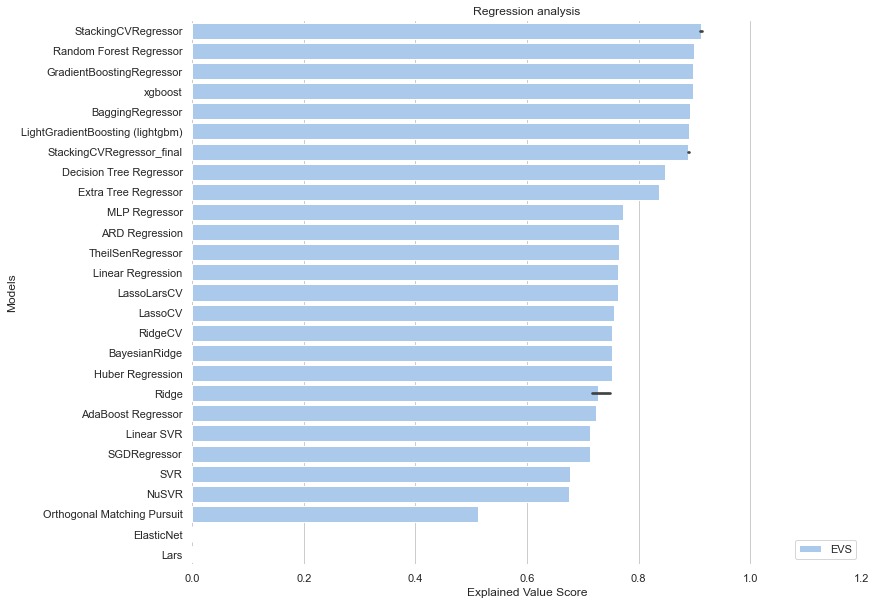

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
results_temp = results.sort_values("EVS", ascending=False)
sns.barplot(x="EVS", y="Model", data=results_temp,
            label="EVS", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1.2), ylabel="Models",
       xlabel="Explained Value Score",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

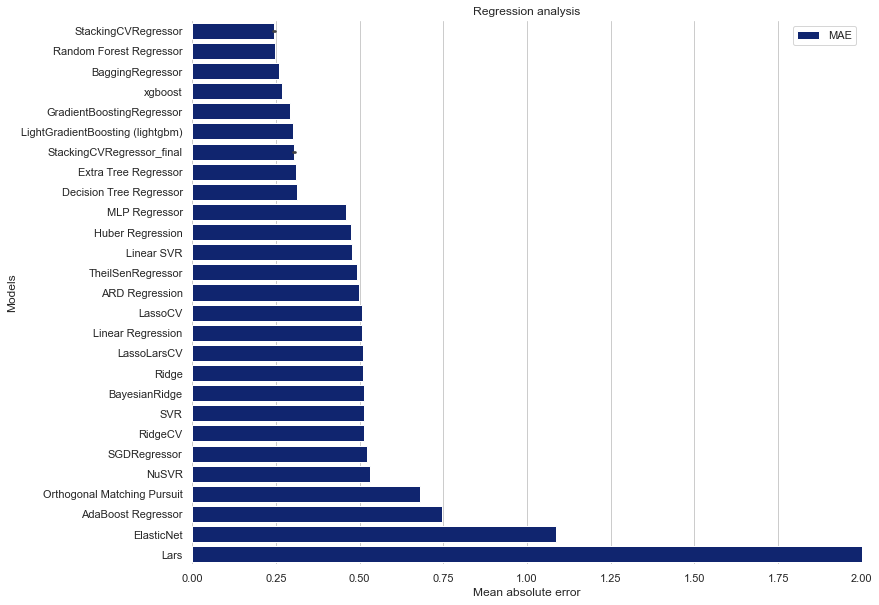

In [202]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes("dark")
results_temp = results.sort_values("MAE", ascending=True)
sns.barplot(x="MAE", y="Model", data=results_temp,
            label="MAE", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2), ylabel="Models",
       xlabel="Mean absolute error",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

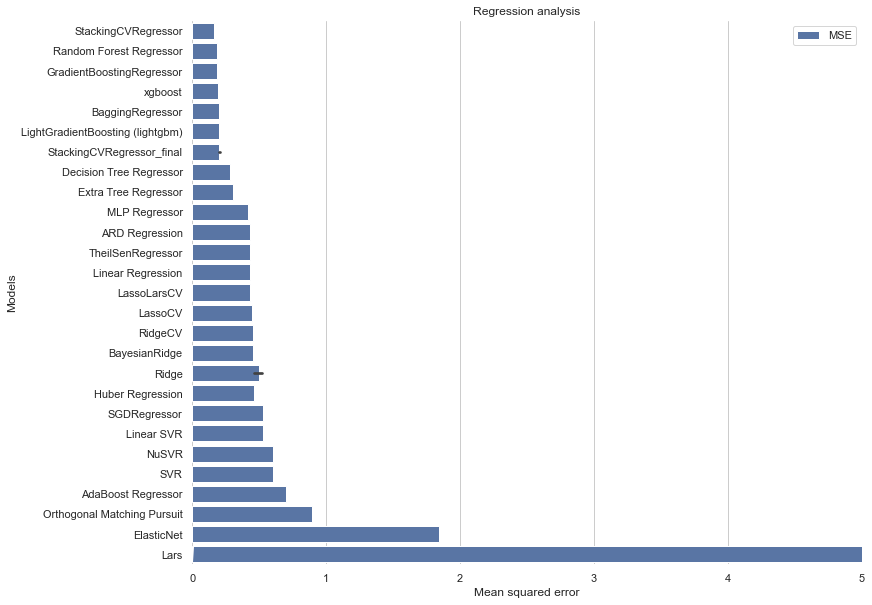

In [203]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes()
results_temp = results.sort_values("MSE", ascending=True)#.iloc[:8] # just the 8 first
sns.barplot(x="MSE", y="Model", data=results_temp,
            label="MSE", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 5), ylabel="Models",
       xlabel="Mean squared error",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

## 7. Modeling a natural language processing to be possible interpret the effect column

In [204]:
df_text = pd.DataFrame(df_all_clean['effect'])
df_text.head()

,effect
10,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.
66,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead."
11,Roar: Your confused creatures get +2 strength.
67,Afterlife: Summon a random legendary creature.
68,Afterlife: Deal 2 damage to a random enemy creature.


### 7.1 Cleaning Text

In [205]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[ *]', ' ', text)
    return text

In [206]:
df_text['effect_clean'] = df_text['effect'].apply(clean_text)
df_text.head(5)

,effect,effect_clean
10,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,roar obliterate a card in your hand afterlife draw a card
66,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",roar if a god is below health it heals for if they are above it is dealt damage instead
11,Roar: Your confused creatures get +2 strength.,roar your confused creatures get strength
67,Afterlife: Summon a random legendary creature.,afterlife summon a random legendary creature
68,Afterlife: Deal 2 damage to a random enemy creature.,afterlife deal damage to a random enemy creature


### 7.2 Removing StopWords

In [207]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df_text['effect_clean'] = df_text['effect_clean'].apply(remove_stopwords)
df_text.head()

,effect,effect_clean
10,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,roar obliterate card hand afterlife draw card
66,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",roar god health heals dealt damage instead
11,Roar: Your confused creatures get +2 strength.,roar confused creatures get strength
67,Afterlife: Summon a random legendary creature.,afterlife summon random legendary creature
68,Afterlife: Deal 2 damage to a random enemy creature.,afterlife deal damage random enemy creature


### 7.3 Stemming

In [208]:
import nltk

stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [209]:
df_text['effect_clean'] = df_text['effect_clean'].apply(stemm_text)
df_text.head()

,effect,effect_clean
10,Roar: Obliterate a card in your hand.<br>Afterlife: Draw a card.,roar obliter card hand afterlif draw card
66,"Roar: If a god is below 16 health, it heals for 4. If they are above 16, it is dealt 4 damage instead.",roar god health heal dealt damag instead
11,Roar: Your confused creatures get +2 strength.,roar confus creatur get strength
67,Afterlife: Summon a random legendary creature.,afterlif summon random legendari creatur
68,Afterlife: Deal 2 damage to a random enemy creature.,afterlif deal damag random enemi creatur


### 7.4 Vectorization

#### 7.4.1 CountVectorizer

In [219]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer conta quantos tokens, de cada tipo, aparecem em cada mensagem e criam um vetor para cada mensagem.
vect = CountVectorizer()
df_text_clean = vect.fit_transform(df_text.effect_clean)

df_text_clean = pd.DataFrame(df_text_clean.toarray(), columns=vect.get_feature_names_out(), index=df_text.index)
display(df_text_clean.head())

#print(vect.get_feature_names_out())
#print(df_text_clean.toarray())
print(df_text_clean.shape)

,abil,ach,acolyt,across,add,addit,aether,afterlif,agrodor,aid,also,amazon,among,amount,amplur,ancient,anim,anoth,anubian,appli,armor,artific,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,beam,bearstrid,beast,becom,belong,beneath,beserk,bind,black,bladefli,bless,blight,blitz,boar,board,bodyguard,bomb,boost,bottom,broken,buff,burn,caller,can,cannot,cant,card,case,cast,chain,chang,charact,chariot,chicken,choos,chosen,closer,combin,complet,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,dealt,death,debuff,decept,decid,deck,delv,demon,destroy,die,differ,discard,discipl,divin,dog,domain,don,done,doubl,draft,dragon,draw,drawn,durabl,echo,effect,egg,eight,either,elementalist,empti,enchant,end,enemi,enter,equal,equip,escape,everi,exclud,execution,experiment,explos,extra,fan,farland,favor,fill,final,first,five,flameblad,flank,flanker,follow,foolhardi,footsoldi,forese,form,fortress,four,frenzi,friend,frontlin,fruit,full,fulli,gain,gem,generous,get,ghost,give,given,go,god,godblitz,goe,golem,guard,guardian,guild,hand,hasnt,head,heal,health,hidden,highest,highestcost,hold,hook,huscarl,hydra,hyena,impl,includ,increas,infern,inflict,injur,instead,iron,jaguar,keep,kidnapp,larceni,last,least,leech,legendari,less,lethenon,light,lock,look,lose,lowest,lowestcost,magic,malfunct,mana,manaborn,mani,match,maximum,may,mind,minus,mirror,miss,move,much,mystic,natur,nether,netherbeast,netherl,netherspawn,next,nimbl,nondecept,nonneutr,nonzombi,number,obliter,odysseus,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overgrown,overkil,owl,owner,parthen,per,perman,pick,pillar,pixi,plant,play,player,point,portabl,power,prison,probe,propyrean,protect,protector,pull,put,rais,rampart,random,randomis,rat,rave,reach,receiv,recruit,reduc,reflect,refresh,regen,relic,remain,remov,repeat,replac,return,reveal,roar,rockdrak,rogu,rune,second,seer,select,sentient,set,seven,shadow,shard,shax,shimmerscal,shuffl,side,sight,sinc,six,sixmana,skelet,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,start,steal,strength,strike,strongest,structur,summon,surviv,survivor,swap,switch,taint,take,taken,target,ten,three,thunder,tie,time,timebomb,top,total,transform,treant,tree,tri,tribe,trigger,turn,twice,twin,two,unchain,underbrush,uniti,unless,unlock,unus,upgrad,use,valid,valu,vibrant,victor,vike,void,voyag,walk,war,ward,warrior,wast,way,weakest,weapon,whenev,wild,wisdom,wisp,without,worth,wrath,xx,young,your,zealot,zombi
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0

(887, 377)


#### 7.4.2 TF-IDF

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_tf = TfidfVectorizer()
df_text_clean = vect_tf.fit_transform(df_text.effect_clean)

df_text_clean = pd.DataFrame(df_text_clean.toarray(), columns=vect_tf.get_feature_names_out(), index=df_text.index)
display(df_text_clean.head())

#print(vect_tf.get_feature_names_out())
#print(df_text_clean.toarray())
print(df_text_clean.shape)

,abil,ach,acolyt,across,add,addit,aether,afterlif,agrodor,aid,also,amazon,among,amount,amplur,ancient,anim,anoth,anubian,appli,armor,artific,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,beam,bearstrid,beast,becom,belong,beneath,beserk,bind,black,bladefli,bless,blight,blitz,boar,board,bodyguard,bomb,boost,bottom,broken,buff,burn,caller,can,cannot,cant,card,case,cast,chain,chang,charact,chariot,chicken,choos,chosen,closer,combin,complet,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,dealt,death,debuff,decept,decid,deck,delv,demon,destroy,die,differ,discard,discipl,divin,dog,domain,don,done,doubl,draft,dragon,draw,drawn,durabl,echo,effect,egg,eight,either,elementalist,empti,enchant,end,enemi,enter,equal,equip,escape,everi,exclud,execution,experiment,explos,extra,fan,farland,favor,fill,final,first,five,flameblad,flank,flanker,follow,foolhardi,footsoldi,forese,form,fortress,four,frenzi,friend,frontlin,fruit,full,fulli,gain,gem,generous,get,ghost,give,given,go,god,godblitz,goe,golem,guard,guardian,guild,hand,hasnt,head,heal,health,hidden,highest,highestcost,hold,hook,huscarl,hydra,hyena,impl,includ,increas,infern,inflict,injur,instead,iron,jaguar,keep,kidnapp,larceni,last,least,leech,legendari,less,lethenon,light,lock,look,lose,lowest,lowestcost,magic,malfunct,mana,manaborn,mani,match,maximum,may,mind,minus,mirror,miss,move,much,mystic,natur,nether,netherbeast,netherl,netherspawn,next,nimbl,nondecept,nonneutr,nonzombi,number,obliter,odysseus,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overgrown,overkil,owl,owner,parthen,per,perman,pick,pillar,pixi,plant,play,player,point,portabl,power,prison,probe,propyrean,protect,protector,pull,put,rais,rampart,random,randomis,rat,rave,reach,receiv,recruit,reduc,reflect,refresh,regen,relic,remain,remov,repeat,replac,return,reveal,roar,rockdrak,rogu,rune,second,seer,select,sentient,set,seven,shadow,shard,shax,shimmerscal,shuffl,side,sight,sinc,six,sixmana,skelet,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,start,steal,strength,strike,strongest,structur,summon,surviv,survivor,swap,switch,taint,take,taken,target,ten,three,thunder,tie,time,timebomb,top,total,transform,treant,tree,tri,tribe,trigger,turn,twice,twin,two,unchain,underbrush,uniti,unless,unlock,unus,upgrad,use,valid,valu,vibrant,victor,vike,void,voyag,walk,war,ward,warrior,wast,way,weakest,weapon,whenev,wild,wisdom,wisp,without,worth,wrath,xx,young,your,zealot,zombi
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.582458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.283526,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.528061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

(887, 377)


### 7.5 Putting everything together

In [225]:
df_all_NLP = pd.concat([df_text_clean, df_all_clean.loc[:,'god_deception':'Unique Deck WR']],axis=1)
display(df_all_NLP.head())
print(df_all_NLP.shape)

,abil,ach,acolyt,across,add,addit,aether,afterlif,agrodor,aid,also,amazon,among,amount,amplur,ancient,anim,anoth,anubian,appli,armor,artific,atlantean,attack,backlin,badger,barb,barrel,base,battlethral,beam,bearstrid,beast,becom,belong,beneath,beserk,bind,black,bladefli,bless,blight,blitz,boar,board,bodyguard,bomb,boost,bottom,broken,buff,burn,caller,can,cannot,cant,card,case,cast,chain,chang,charact,chariot,chicken,choos,chosen,closer,combin,complet,confus,control,copi,cost,creat,creatur,current,damag,dead,deal,dealt,death,debuff,decept,decid,deck,delv,demon,destroy,die,differ,discard,discipl,divin,dog,domain,don,done,doubl,draft,dragon,draw,drawn,durabl,echo,effect,egg,eight,either,elementalist,empti,enchant,end,enemi,enter,equal,equip,escape,everi,exclud,execution,experiment,explos,extra,fan,farland,favor,fill,final,first,five,flameblad,flank,flanker,follow,foolhardi,footsoldi,forese,form,fortress,four,frenzi,friend,frontlin,fruit,full,fulli,gain,gem,generous,get,ghost,give,given,go,god,godblitz,goe,golem,guard,guardian,guild,hand,hasnt,head,heal,health,hidden,highest,highestcost,hold,hook,huscarl,hydra,hyena,impl,includ,increas,infern,inflict,injur,instead,iron,jaguar,keep,kidnapp,larceni,last,least,leech,legendari,less,lethenon,light,lock,look,lose,lowest,lowestcost,magic,malfunct,mana,manaborn,mani,match,maximum,may,mind,minus,mirror,miss,move,much,mystic,natur,nether,netherbeast,netherl,netherspawn,next,nimbl,nondecept,nonneutr,nonzombi,number,obliter,odysseus,olympian,one,onto,oppon,oppos,option,order,otherwis,outcom,outcome,overgrown,overkil,owl,owner,parthen,per,perman,pick,pillar,pixi,plant,play,player,point,portabl,power,prison,probe,propyrean,protect,protector,pull,put,rais,rampart,random,randomis,rat,rave,reach,receiv,recruit,reduc,reflect,refresh,regen,relic,remain,remov,repeat,replac,return,reveal,roar,rockdrak,rogu,rune,second,seer,select,sentient,set,seven,shadow,shard,shax,shimmerscal,shuffl,side,sight,sinc,six,sixmana,skelet,skeleton,skulker,skull,sleep,soldier,soulless,spell,spirit,split,start,steal,strength,strike,strongest,structur,summon,surviv,survivor,swap,switch,taint,take,taken,target,ten,three,thunder,tie,time,timebomb,top,total,transform,treant,tree,tri,tribe,trigger,turn,twice,twin,two,unchain,underbrush,uniti,unless,unlock,unus,upgrad,use,valid,valu,vibrant,victor,vike,void,voyag,walk,war,ward,warrior,wast,way,weakest,weapon,whenev,wild,wisdom,wisp,without,worth,wrath,xx,young,your,zealot,zombi,god_deception,god_light,god_magic,god_nature,god_neutral,god_war,rarity_epic,rarity_legendary,rarity_rare,tribe_aether,tribe_amazon,tribe_anubian,tribe_atlantean,tribe_dragon,tribe_guild,tribe_mystic,tribe_nether,tribe_olympian,tribe_structure,tribe_viking,tribe_wild,type_spell,type_weapon,set_etherbots,set_genesis,set_order,set_promo,set_trial,"(mana,)","(attack,)","(health,)",In % of Decks,Deck win rate,Unique Deck WR
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.582458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.283526,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.528061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

(887, 411)


#### 5.5.1 Small EAD

C:\Users\isaac\AppData\Local\Temp\ipykernel_2848\3754770008.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


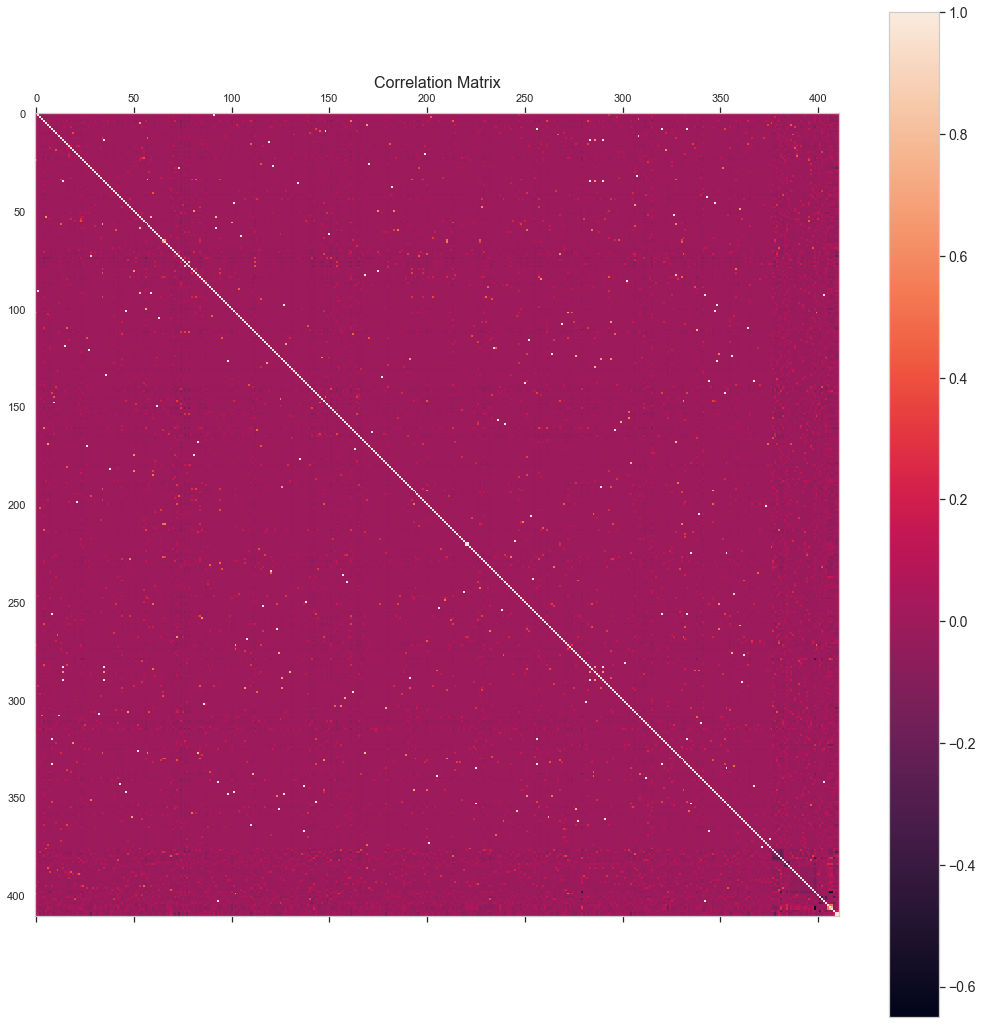

In [228]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(18, 18))


plt.matshow(df_all_NLP.corr(), fignum=f.number)
#plt.xticks(range(df_all_NLP.select_dtypes(['number']).shape[1]), df_all_clean.select_dtypes(['number']).columns, fontsize=14, rotation=90)
#plt.yticks(range(df_all_NLP.select_dtypes(['number']).shape[1]), df_all_clean.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.grid(False)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

plt.show()

#### 6.1 Train/Test split

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_all_NLP, y, test_size=0.33, random_state=1)

In [231]:
print("X train shape - ", X_train.shape)
print("X test shape - ", X_test.shape)
print("y train shape - ", y_train.shape)
print("y test shape - ", y_test.shape)

X train shape -  (594, 411)
X test shape -  (293, 411)
y train shape -  (594, 1)
y test shape -  (293, 1)


#### 6.2 Preparing results

In [232]:
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import explained_variance_score # EVS

In [233]:
results = {
    "Model":[],
    "Kind":[],
    "MAE":[],
    "MSE":[],
    "EVS":[]
}
results = pd.DataFrame(results)

In [234]:
y_true = y_test
X_df, X_train, X_test = X_train, X_train.values, X_test.values
def addModelToResults(model_name="None",model_kind="None"):
    '''Essa função adiciona o resultado do seu modelo ao "results" global,
    lembre-se de criar um results com as variaveis corretas:
        results = {
        "Model":[],
        "Kind":[],
        "MAE":[],
        "MSE":[],
        "EVS":[]
    }'''
    global results
    parameters = {
        'Model': [model_name],
        'Kind': [model_kind],
        'MAE': [mean_absolute_error(y_true, y_pred)],
        'MSE': [mean_squared_error(y_true, y_pred)],
        'EVS': [explained_variance_score(y_true, y_pred)]
    }
    parameters = pd.DataFrame(parameters)
    results = pd.concat([results, parameters], ignore_index=True)

#### 6.3 Modeling

In [235]:
# linear models
from sklearn.linear_model import Ridge, LinearRegression, Lars, BayesianRidge, Perceptron, SGDRegressor
from sklearn.linear_model import RidgeCV, ElasticNet, LassoCV, LassoLarsCV, OrthogonalMatchingPursuit, ARDRegression
from sklearn.linear_model import PassiveAggressiveClassifier, TheilSenRegressor, HuberRegressor

# tree models
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor

# svm models
from sklearn.svm import LinearSVR, NuSVR, SVR

# closed neural network models
from sklearn.neural_network import MLPRegressor

# open neural network models
from keras.models import Sequential
from keras.layers import Dense, Dropout

# ensemble models
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

##### 6.3.1 Linear Models

In [236]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
addModelToResults('Ridge',"Linear")

In [237]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
addModelToResults('Linear Regression',"Linear")

In [238]:
model_BR = BayesianRidge()
model_BR.fit(X_train, y_train.values.ravel())
y_pred = model_BR.predict(X_test)
addModelToResults('BayesianRidge',"Linear")

In [239]:
model_Lars = Lars(normalize=False)
model_Lars.fit(X_train, y_train)
y_pred = model_Lars.predict(X_test)
addModelToResults('Lars',"Linear")

c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 98 iterations, i.e. alpha=1.245e-03, with an active set of 96 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 127 iterations, i.e. alpha=9.489e-04, with an active set of 122 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: R

c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 303 iterations, i.e. alpha=2.647e-01, with an active set of 256 regressors, and the smallest cholesky pivot element being 3.942e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 303 iterations, i.e. alpha=2.647e-01, with an active set of 256 regressors, and the smallest cholesky pivot element being 5.268e-09. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning:

c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 401 iterations, i.e. alpha=6.633e-03, with an active set of 298 regressors, and the smallest cholesky pivot element being 4.712e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 401 iterations, i.e. alpha=6.444e-03, with an active set of 298 regressors, and the smallest cholesky pivot element being 4.408e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning:

In [240]:
model_RCV = RidgeCV()
model_RCV.fit(X_train, y_train)
y_pred = model_RCV.predict(X_test)
addModelToResults('RidgeCV',"Linear")

In [241]:
model_EN = ElasticNet()
model_EN.fit(X_train, y_train)
y_pred = model_EN.predict(X_test)
addModelToResults('ElasticNet',"Linear")

In [242]:
model_LCV = LassoCV()
model_LCV.fit(X_train, y_train.values.ravel())
y_pred = model_LCV.predict(X_test)
addModelToResults('LassoCV',"Linear")

In [243]:
model_LLCV = LassoLarsCV(normalize=False)
model_LLCV.fit(X_train, y_train.values.ravel())
y_pred = model_LLCV.predict(X_test)
addModelToResults('LassoLarsCV',"Linear")

c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 166 iterations, i.e. alpha=7.187e-04, with an active set of 144 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 181 iterations, i.e. alpha=6.472e-04, with an active set of 159 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning:

In [244]:
model_OMP = OrthogonalMatchingPursuit(normalize=False)
model_OMP.fit(X_train, y_train.values.ravel())
y_pred = model_OMP.predict(X_test)
addModelToResults('Orthogonal Matching Pursuit',"Linear")

In [245]:
model_ARDR = ARDRegression()
model_ARDR.fit(X_train, y_train.values.ravel())
y_pred = model_ARDR.predict(X_test)
addModelToResults('ARD Regression',"Linear")

In [246]:
model_SGDR = SGDRegressor(max_iter=1000)
model_SGDR.fit(X_train, y_train.values.ravel())
y_pred = model_SGDR.predict(X_test)
addModelToResults('SGDRegressor',"Linear")

In [250]:
#model_TSR = TheilSenRegressor()
#model_TSR.fit(X_train, y_train.values.ravel())
#y_pred = model_TSR.predict(X_test)
#addModelToResults('TheilSenRegressor',"Linear")

In [251]:
model_huber = HuberRegressor(max_iter=1000)
model_huber.fit(X_train, y_train.values.ravel())
y_pred = model_huber.predict(X_test)
addModelToResults('Huber Regression',"Linear")

c:\users\isaac\desktop\isaac\faculdade\iniciação cientifica\ferias\estudando\env\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### 6.3.2 Tree Models

In [252]:
model_ETR = ExtraTreeRegressor()
model_ETR.fit(X_train, y_train)
y_pred = model_ETR.predict(X_test)
addModelToResults('Extra Tree Regressor',"Tree")

In [253]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)
y_pred = model_DTR.predict(X_test)
addModelToResults('Decision Tree Regressor',"Tree")

#### 6.3.3 Support vector machines Models

In [254]:
model_linearSVR = LinearSVR(max_iter=10000)
model_linearSVR.fit(X_train, y_train.values.ravel())
y_pred = model_linearSVR.predict(X_test)
addModelToResults('Linear SVR',"SVR")

In [255]:
model_NuSVR = NuSVR()
model_NuSVR.fit(X_train, y_train.values.ravel())
y_pred = model_NuSVR.predict(X_test)
addModelToResults('NuSVR',"SVR")

In [256]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train.values.ravel())
y_pred = model_SVR.predict(X_test)
addModelToResults('SVR',"SVR")

#### 6.3.4 Neural Network Models

In [257]:
model_MLPR = MLPRegressor(max_iter=15000) # 10000 and 1000 hasn't converged yet # hidden_layer_sizes=(2,1000)
model_MLPR.fit(X_train, y_train.values.ravel())
y_pred = model_MLPR.predict(X_test)
addModelToResults('MLP Regressor',"Neural Network")

#### 6.3.5 Ensemble Models

In [258]:
model_adaReg = AdaBoostRegressor() 
model_adaReg.fit(X_train, y_train.values.ravel())
y_pred = model_adaReg.predict(X_test)
addModelToResults('AdaBoost Regressor',"Ensemble")

In [259]:
model_bagReg = BaggingRegressor() 
model_bagReg.fit(X_train, y_train.values.ravel())
y_pred = model_bagReg.predict(X_test)
addModelToResults('BaggingRegressor',"Ensemble")

In [260]:
model_gradReg = GradientBoostingRegressor() 
model_gradReg.fit(X_train, y_train.values.ravel())
y_pred = model_gradReg.predict(X_test)
addModelToResults('GradientBoostingRegressor',"Ensemble")

In [261]:
model_rfReg = RandomForestRegressor() 
model_rfReg.fit(X_train, y_train.values.ravel())
y_pred = model_rfReg.predict(X_test)
addModelToResults('Random Forest Regressor',"Ensemble")

In [262]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

ridge = Ridge(alpha = 9.5)

lightgbm = LGBMRegressor()

xgboost = XGBRegressor()

ardr = ARDRegression()

#stack
stack_gen=StackingCVRegressor(
    regressors=(ridge,lightgbm,xgboost,ardr),
    meta_regressor=lightgbm,
    use_features_in_secondary=True
)

In [263]:
#scoring
from sklearn.model_selection import cross_val_score
print("cross validated scores")

for model,label in zip([ridge,lightgbm,xgboost,ardr,stack_gen],['Ridge','lightgbm','xgboost','ardr','StackingCVRegressor']):
    
    SG_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
    print("RMSE", np.sqrt(-SG_scores.mean()), label)

cross validated scores
RMSE 0.8209798336588661 Ridge
RMSE 0.6127100791810358 lightgbm
RMSE 0.46257567136770433 xgboost
RMSE 0.7360233655138146 ardr
RMSE 0.49647754237418984 StackingCVRegressor


In [264]:
ridge.fit(X_train,y_train.values.ravel())
ridge_preds = ridge.predict(X_test)
y_pred = ridge_preds
addModelToResults('Ridge',"Linear_Stacking")

lightgbm.fit(X_train,y_train.values.ravel())
lightgbm_preds = lightgbm.predict(X_test)
y_pred = lightgbm_preds
addModelToResults('LightGradientBoosting (lightgbm)',"Ensemble_Stacking")

xgboost.fit(X_train,y_train.values.ravel())
xgboost_preds = xgboost.predict(X_test)
y_pred = xgboost_preds
addModelToResults('xgboost',"Ensemble_Stacking")

ardr.fit(X_train,y_train.values.ravel())
ardr_preds = ardr.predict(X_test)
y_pred = ardr_preds
addModelToResults('ARD Regression',"Linear_Stacking")

stack_gen.fit(X_train,y_train.values.ravel())
stack_gen_preds = stack_gen.predict(X_test)
y_pred = stack_gen_preds
addModelToResults('StackingCVRegressor',"Ensemble_Stacking")

In [265]:
stack_preds = ((0.2*lightgbm_preds)+(0.2*xgboost_preds)+(0.25*ridge_preds)+(0.1*ardr_preds)+(0.25*stack_gen_preds))
y_pred = stack_preds
addModelToResults('StackingCVRegressor_final',"Ensemble_Stacking")

In [266]:
results

,Model,Kind,MAE,MSE,EVS
0,Ridge,Linear,5.208105e-01,4.925279e-01,7.316827e-01
1,Linear Regression,Linear,1.188228e+10,7.471534e+21,-4.073814e+21
2,BayesianRidge,Linear,5.206570e-01,4.924554e-01,7.317299e-01
3,Lars,Linear,4.726725e+03,4.690536e+07,-2.555707e+07
4,RidgeCV,Linear,5.208105e-01,4.925279e-01,7.316827e-01
5,ElasticNet,Linear,1.087619e+00,1.843764e+00,0.000000e+00
6,LassoCV,Linear,5.100317e-01,4.551515e-01,7.517416e-01
7,LassoLarsCV,Linear,5.101717e-01,4.551136e-01,7.517617e-01
8,Orthogonal Matching Pursuit,Linear,5.458938e-01,4.995238e-01,7.274681e-01
9,ARD Regression,Linear,5.114969e-01,4.633692e-01,7.471978e-01


### 6.4 Visualization

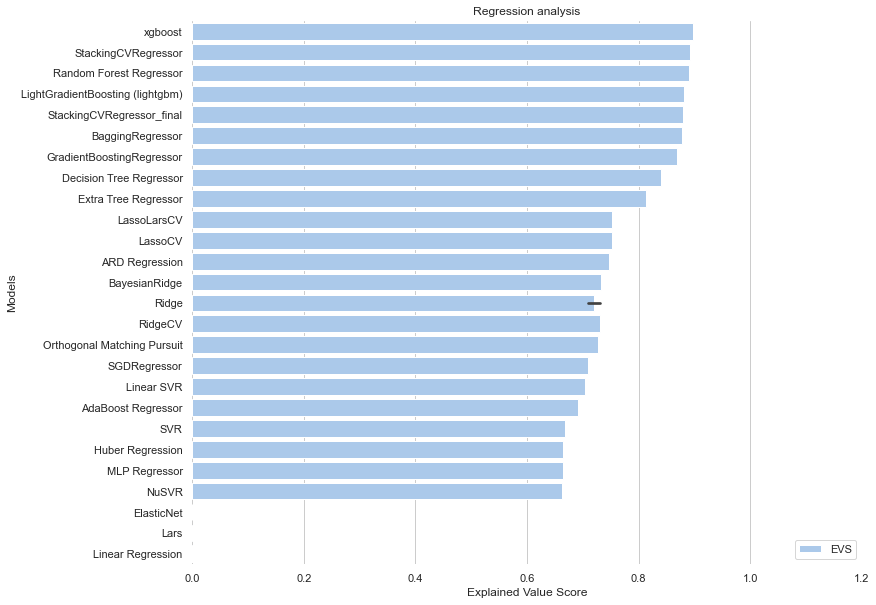

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
results_temp = results.sort_values("EVS", ascending=False)
sns.barplot(x="EVS", y="Model", data=results_temp,
            label="EVS", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1.2), ylabel="Models",
       xlabel="Explained Value Score",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

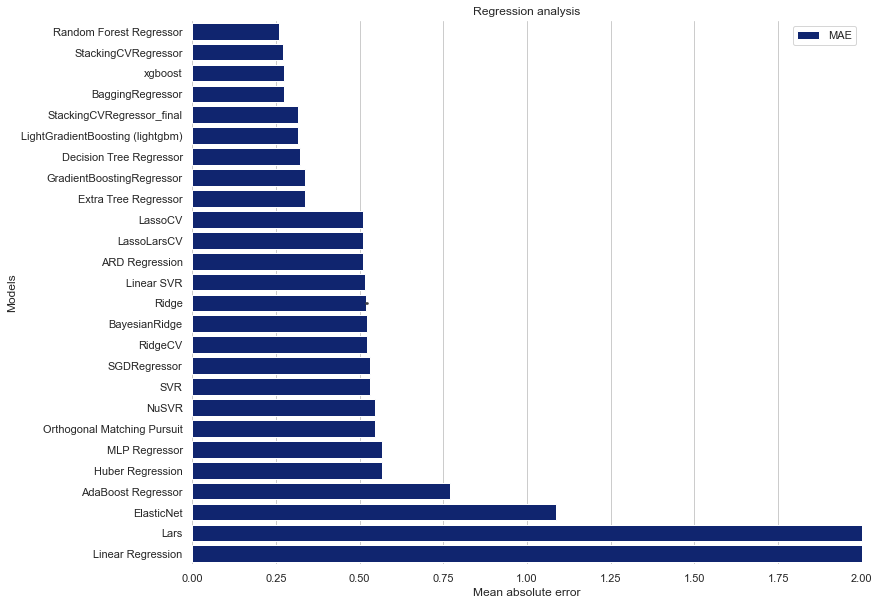

In [268]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes("dark")
results_temp = results.sort_values("MAE", ascending=True)
sns.barplot(x="MAE", y="Model", data=results_temp,
            label="MAE", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2), ylabel="Models",
       xlabel="Mean absolute error",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()

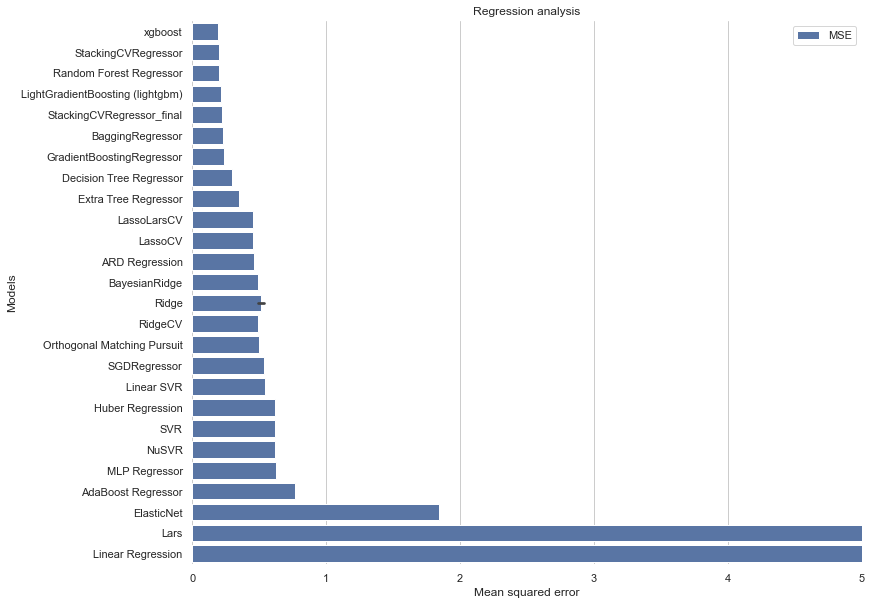

In [269]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the total crashes
sns.set_color_codes()
results_temp = results.sort_values("MSE", ascending=True)#.iloc[:8] # just the 8 first
sns.barplot(x="MSE", y="Model", data=results_temp,
            label="MSE", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 5), ylabel="Models",
       xlabel="Mean squared error",title='Regression analysis')
sns.despine(left=True, bottom=True)
plt.show()